# Attribute Information:

- Gender: Gender of the passengers (Female, Male)

- Customer Type: The customer type (Loyal customer, disloyal customer)

- Age: The actual age of the passengers

- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- Flight distance: The flight distance of this journey

- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

- Ease of Online booking: Satisfaction level of online booking

- Gate location: Satisfaction level of Gate location

- Food and drink: Satisfaction level of Food and drink

- Online boarding: Satisfaction level of online boarding

- Seat comfort: Satisfaction level of Seat comfort

- Inflight entertainment: Satisfaction level of inflight entertainment

- On-board service: Satisfaction level of On-board service

- Leg room service: Satisfaction level of Leg room service

- Baggage handling: Satisfaction level of baggage handling

- Check-in service: Satisfaction level of Check-in service

- Inflight service: Satisfaction level of inflight service

- Cleanliness: Satisfaction level of Cleanliness

- Departure Delay in Minutes: Minutes delayed when departure

- Arrival Delay in Minutes: Minutes delayed when Arrival
 
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Import libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into training and validation sets
from sklearn.model_selection import train_test_split 

# to calculate the accuracy of the model
from sklearn.metrics import accuracy_score 

# to evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

# to train a Gradient Boosting model for classification
from sklearn.ensemble import GradientBoostingClassifier 

# to train an AdaBoost model for classification
from sklearn.ensemble import AdaBoostClassifier 

In [2]:
# Load the train and test data into separate dataframes
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
combined_data = pd.concat([train_data, test_data], axis=0)

In [4]:
# Display the dataframe
combined_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
# Reset the index
combined_data = combined_data.reset_index(drop=True)

# Exploratory Data Analysis(EDA)

In [6]:
# Drop the 'Unnamed: 0' and 'id' columns
combined_data = combined_data.drop(['Unnamed: 0', 'id'], axis=1)

In [7]:
# Display the first 5 rows of the DataFrame
combined_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
combined_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
# Display the last 5 rows of the DataFrame
combined_data.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [10]:
# Display a summary of the basic statistics for each column of the DataFrame
combined_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
# Display a summary of the DataFrame, including column data types and missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [12]:
# Display the dimensions of the DataFrame
combined_data.shape

(129880, 23)

In [13]:
combined_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [14]:
# Drop null values in the 'column_name' column
combined_data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [15]:
combined_data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
# Generate a list of colors for the color palette
colors = sns.color_palette("Set3")

# Set the color palette for Seaborn plots
sns.set_palette(colors)

In [17]:
# Replace the 'Female' and 'Male' values in the 'Gender' column with 0 and 1, respectively
combined_data['Gender'] = combined_data['Gender'].replace(['Female', 'Male'], [0, 1])

In [18]:
# Display the count of each unique value in the 'Gender' column
combined_data['Gender'].value_counts()

0    65703
1    63784
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

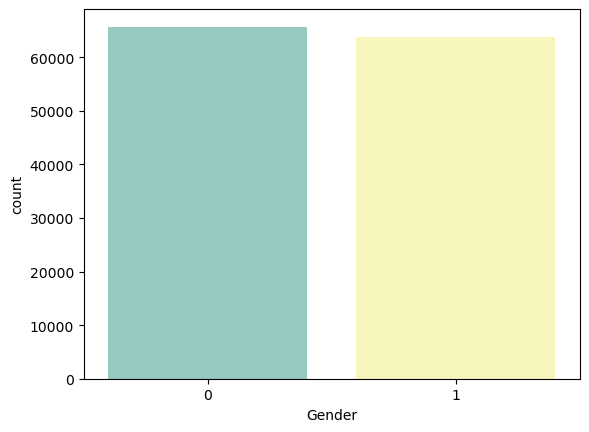

In [19]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
sns.countplot(x ='Gender', data = combined_data)

In [20]:
# Replace the 'disloyal Customer' and 'Loyal Customer' values in the 'Customer Type' column with 0 and 1, respectively
combined_data['Customer Type'] = combined_data['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1])

In [21]:
# Display the count of each unique value in the 'Customer Type' column
combined_data['Customer Type'].value_counts()

1    105773
0     23714
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

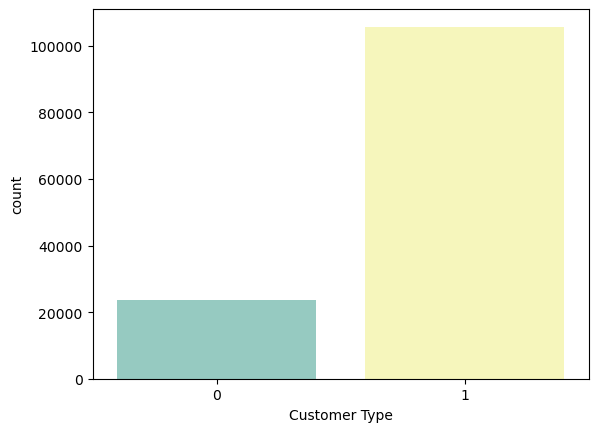

In [22]:
# Create a count plot of the 'Customer Type' column
sns.countplot(x ='Customer Type', data = combined_data)

In [23]:
# Create a count plot of the 'Customer Type' column
combined_data.groupby(['Customer Type', 'Gender']).agg({'Age': 'count'})

Age
Customer Type Gender       
0             0       12804
              1       10910
1             0       52899
              1       52874

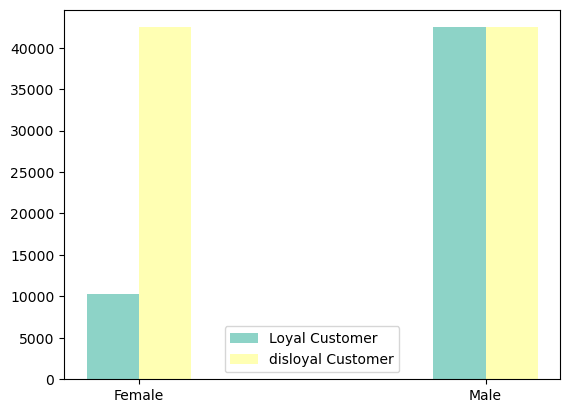

In [24]:
# Define the counts of 'Loyal Customer' and 'disloyal Customer' for each 'Gender' category
Loyal_Customer = (10269, 42458)
disloyal_Customer = (42458, 42465)

# Define the x-axis labels and the width of each bar
X = np.arange(2) 
width = 0.15 

# Create the bar plot
plt.bar(X, Loyal_Customer, width, label='Loyal Customer')
plt.bar(X + width, disloyal_Customer, width, label='disloyal Customer')
plt.xticks(X + width / 2, ("Female", "Male"))
plt.legend(loc='best')

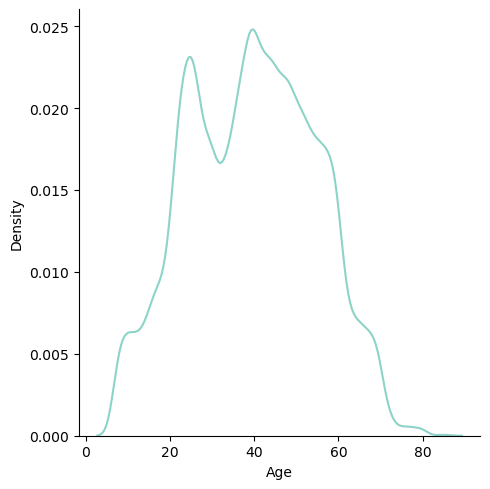

In [25]:
# Create a kernel density plot of the 'Age' column
sns.displot(combined_data, x="Age", kind="kde")

In [26]:
# Replace the values in the 'Type of Travel' column
combined_data['Type of Travel'] = combined_data['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1])

In [27]:
# Calculate the frequency count of each unique value in the 'Type of Travel' column
combined_data['Type of Travel'].value_counts()

1    89445
0    40042
Name: Type of Travel, dtype: int64

([<matplotlib.patches.Wedge at 0x2e8a8e02190>,
 [Text(-1.0492827799322735, 1.5478713279008693, ''),
  Text(1.0492829248544413, -1.5478712296599189, '')],
 [Text(-0.5723360617812401, 0.8442934515822923, '69%'),
  Text(0.5723361408296953, -0.8442933979963194, '31%')])

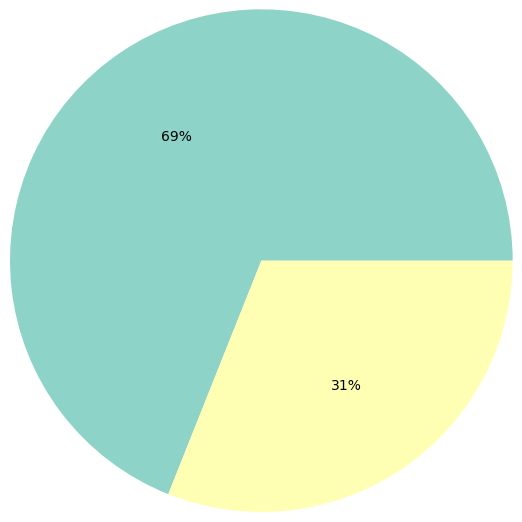

In [28]:
# Define the data to be plotted
TypeOfTravel =[71655, 32249]

# Create the pie chart
plt.pie(TypeOfTravel,  radius=1.7, colors=colors, 
        rotatelabels=False, autopct= "%1.0f%%")

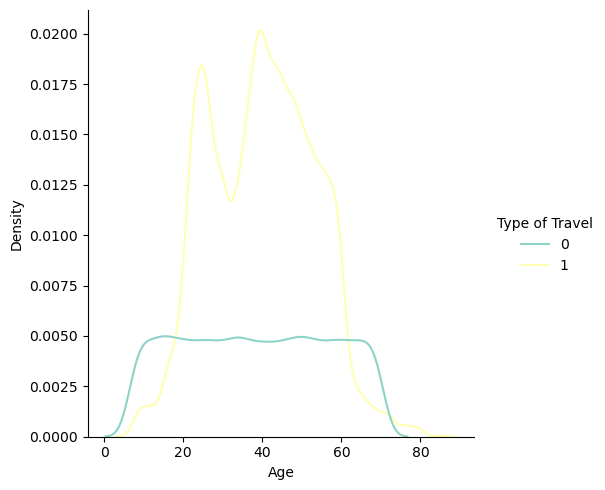

In [29]:
# Create a kernel density plot of the 'Age' column grouped by 'Type of Travel'
sns.displot(combined_data, x="Age", hue="Type of Travel", kind="kde")

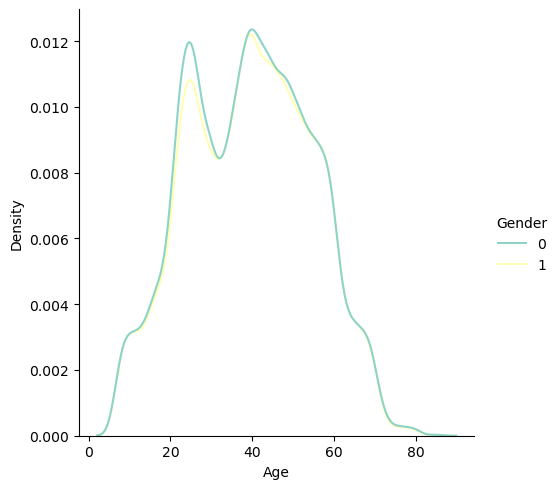

In [30]:
# Create a kernel density plot of the 'Age' column grouped by 'Gender'
sns.displot(combined_data, x="Age", hue="Gender", kind="kde")

In [31]:
# Replace the values in the 'Class' column
combined_data['Class'] = combined_data['Class'].replace(['Business', 'Eco', 'Eco Plus'], [0, 1, 2])

In [32]:
# Calculate the frequency count of each unique value in the 'Class' column
combined_data['Class'].value_counts()

0    61990
1    58117
2     9380
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x2e8a9189af0>,
 [Text(0.12920503903235742, 1.8655310391115574, ''),
  Text(-0.5449962701811024, -1.788820579456947, ''),
  Text(1.8222013691720857, -0.42009781026253445, '')],
 [Text(0.07047547583583132, 1.0175623849699404, '48%'),
  Text(-0.29727069282605584, -0.9757203160674256, '45%'),
  Text(0.9939280195484104, -0.2291442601432006, '7%')])

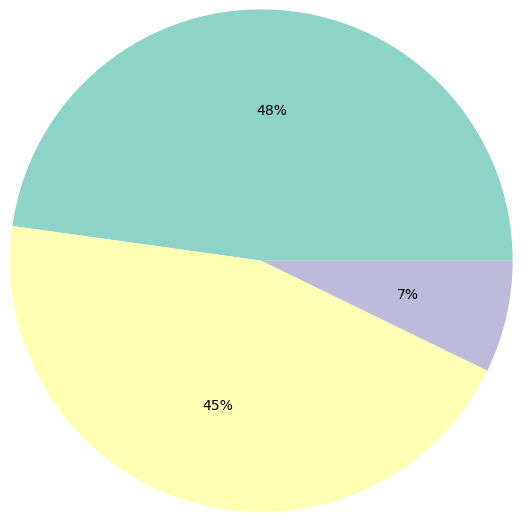

In [33]:
# Define the data to be plotted
passengers_classes =[49665, 46745, 7494]

# Create the pie chart
plt.pie(passengers_classes,  radius=1.7, colors=colors, 
        rotatelabels=False, autopct= "%1.0f%%")

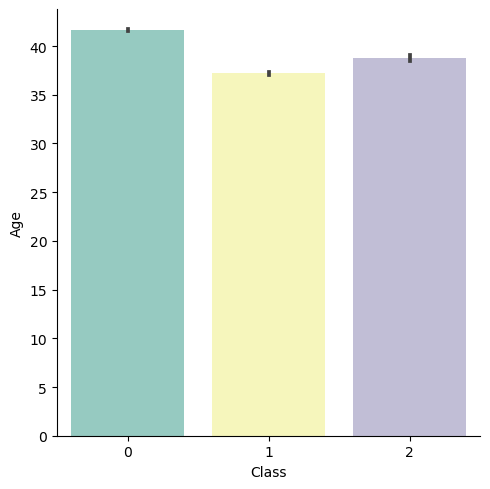

In [34]:
# Create a bar plot of the average age of passengers in each class of travel
sns.catplot(data=combined_data, x='Class', y='Age', kind='bar')

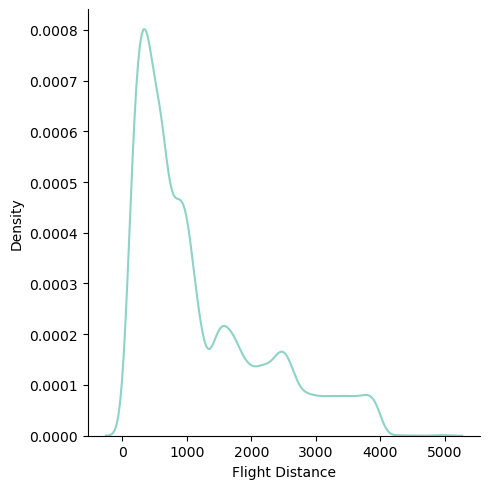

In [35]:
# Create a kernel density plot of the 'Flight Distance' column
sns.displot(combined_data, x="Flight Distance", kind="kde")

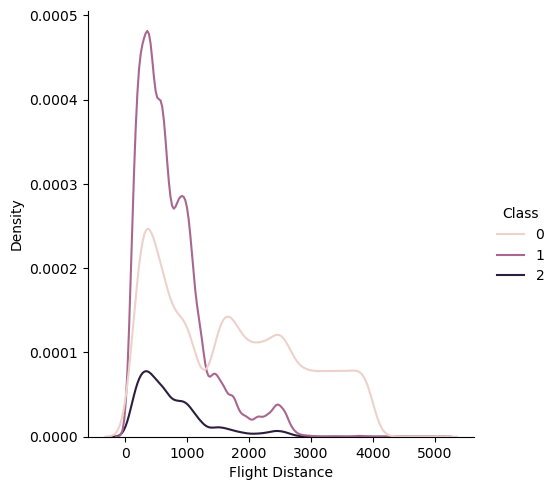

In [36]:
# Create a kernel density plot of the 'Flight Distance' column, with separate distributions for each class of travel
sns.displot(combined_data, x="Flight Distance", hue="Class", kind="kde")

In [37]:
# Calculate the frequency count of each unique value in the 'Inflight wifi service' column
combined_data['Inflight wifi service'].value_counts()

2    32236
3    32087
4    24702
1    22250
5    14304
0     3908
Name: Inflight wifi service, dtype: int64

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

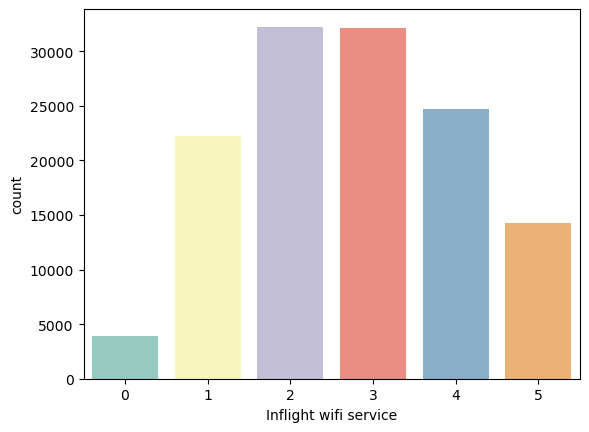

In [38]:
# Create a bar plot of the frequency count of each unique value in the 'Inflight wifi service' column
sns.countplot(x ='Inflight wifi service', data = combined_data)

In [39]:
# Calculate the frequency count of each unique value in the 'Departure/Arrival time convenient' column
combined_data['Departure/Arrival time convenient'].value_counts()

4    31786
5    27906
3    22302
2    21478
1    19351
0     6664
Name: Departure/Arrival time convenient, dtype: int64

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

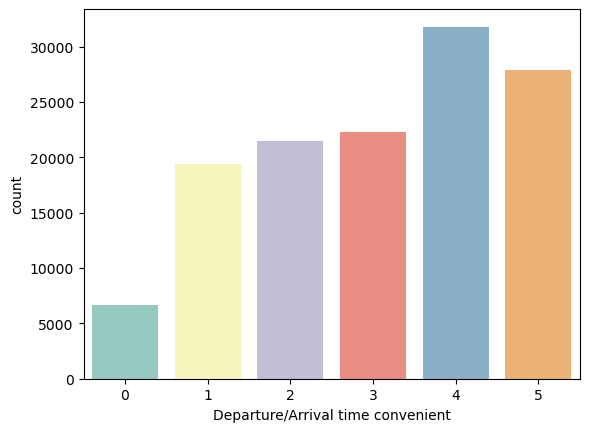

In [40]:
# Create a bar plot of the frequency count of each unique value in the 'Departure/Arrival time convenient' column
sns.countplot(x ='Departure/Arrival time convenient', data = combined_data)

In [41]:
# Calculate the frequency count of each unique value in the 'Ease of Online booking' column
combined_data['Ease of Online booking'].value_counts()

3    30297
2    29983
4    24362
1    21808
5    17371
0     5666
Name: Ease of Online booking, dtype: int64

([<matplotlib.patches.Wedge at 0x2e8ac9d3760>,
 [Text(1.8528172462989998, 0.2529194571736077, ''),
  Text(1.3012156208809509, 1.343033100104164, ''),
  Text(-0.8744230810830406, 1.6529622727906534, ''),
  Text(-1.7356994815146085, -0.6958788040096637, ''),
  Text(0.26367121496538626, -1.8513177713182245, ''),
  Text(1.7083959609281933, -0.7604493676006546, '')],
 [Text(1.0106275888903635, 0.13795606754924056, '4%'),
  Text(0.7097539750259733, 0.7325635091477258, '17%'),
  Text(-0.47695804422711296, 0.9016157851585381, '23%'),
  Text(-0.946745171735241, -0.37957025673254385, '24%'),
  Text(0.14382066270839247, -1.0098096934463043, '19%'),
  Text(0.931852342324469, -0.4147905641458116, '13%')])

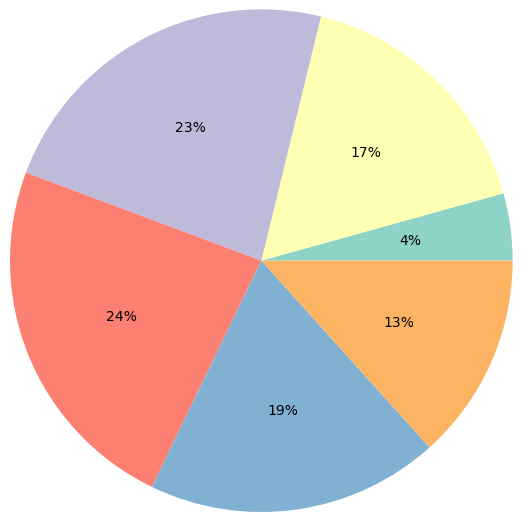

In [42]:
# Define the data for the pie chart
passengers_online_booking_satisfaction =[4487, 17525, 24021, 24449, 19571, 13851]

# Create the pie chart
plt.pie(passengers_online_booking_satisfaction,  radius=1.7, colors=colors, 
        rotatelabels=False, autopct= "%1.0f%%")

In [43]:
# Calculate the frequency count of each unique value in the 'Gate location' column
combined_data['Gate location'].value_counts()

3    35611
4    30376
2    24219
1    21926
5    17354
0        1
Name: Gate location, dtype: int64

<AxesSubplot:xlabel='Gate location', ylabel='count'>

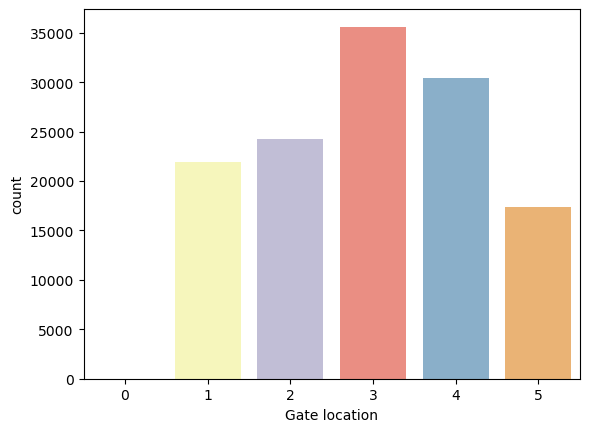

In [44]:
# Create a bar plot of the frequency count of each unique value in the 'Gate location' column
sns.countplot(x ='Gate location', data = combined_data)

In [45]:
# Calculate the frequency count of each unique value in the 'Food and drink' column
combined_data['Food and drink'].value_counts()

4    30477
5    27865
3    27712
2    27293
1    16010
0      130
Name: Food and drink, dtype: int64

<AxesSubplot:xlabel='Food and drink', ylabel='count'>

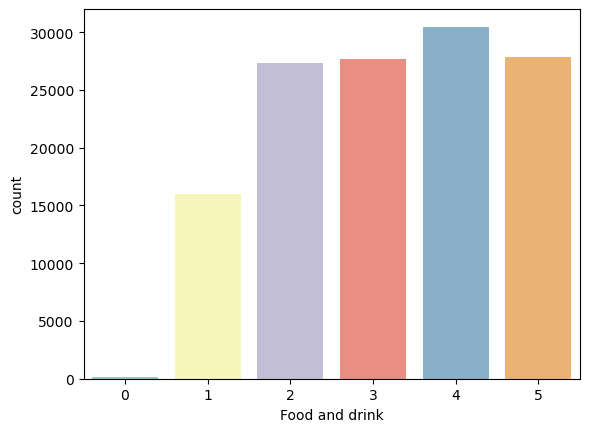

In [46]:
# Create a bar plot of the frequency count of each unique value in the 'Food and drink' column
sns.countplot(x ='Food and drink', data = combined_data)

In [47]:
# Calculate the frequency count of each unique value in the 'Online boarding' column
combined_data['Online boarding'].value_counts()

4    38353
3    27040
5    25941
2    21866
1    13216
0     3071
Name: Online boarding, dtype: int64

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

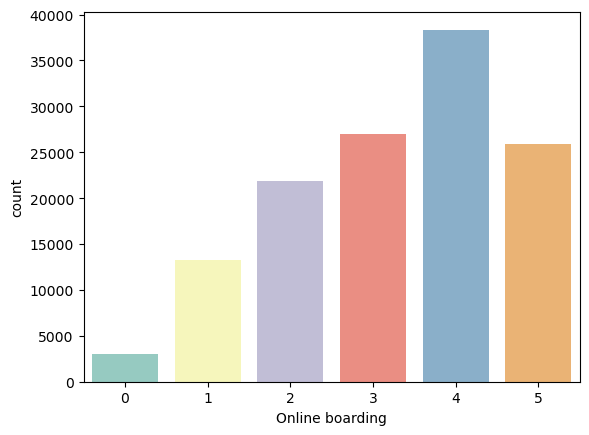

In [48]:
# Create a bar plot of the frequency count of each unique value in the 'Online boarding' column
sns.countplot(x ='Online boarding', data = combined_data)

In [49]:
# Calculate the frequency count of each unique value in the 'Seat comfort' column
combined_data['Seat comfort'].value_counts()

4    39651
5    33056
3    23258
2    18462
1    15059
0        1
Name: Seat comfort, dtype: int64

<AxesSubplot:xlabel='Seat comfort', ylabel='count'>

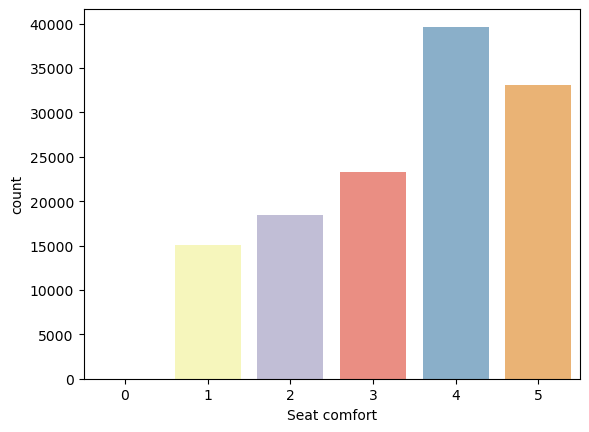

In [50]:
# Create a bar plot of the frequency count of each unique value in the 'Seat comfort' column
sns.countplot(x ='Seat comfort', data = combined_data)

In [51]:
# Calculate the frequency count of each unique value in the 'Inflight entertainment' column
combined_data['Inflight entertainment'].value_counts()

4    36682
5    31451
3    23805
2    21897
1    15634
0       18
Name: Inflight entertainment, dtype: int64

<AxesSubplot:xlabel='Inflight entertainment', ylabel='count'>

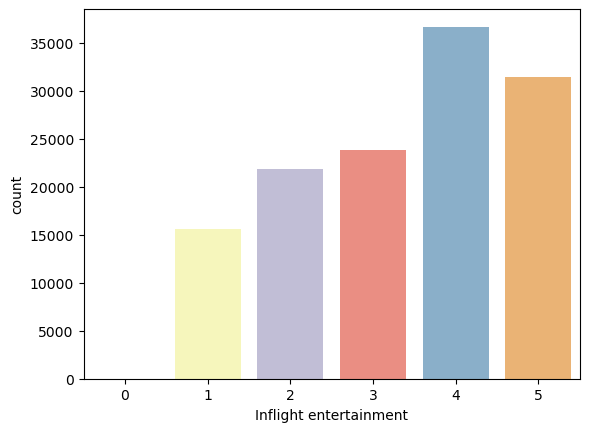

In [52]:
# Create a bar plot of the frequency count of each unique value in the 'Inflight entertainment' column
sns.countplot(x ='Inflight entertainment', data = combined_data)

In [53]:
# Calculate the frequency count of each unique value in the 'On-board service' column
combined_data['On-board service'].value_counts()

4    38587
5    29407
3    28460
2    18290
1    14738
0        5
Name: On-board service, dtype: int64

<AxesSubplot:xlabel='On-board service', ylabel='count'>

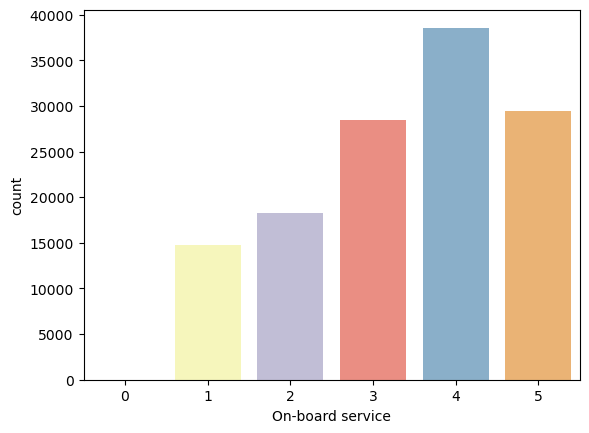

In [54]:
# Create a bar plot of the frequency count of each unique value in the 'On-board service' column
sns.countplot(x ='On-board service', data = combined_data)

In [55]:
# Calculate the frequency count of each unique value in the 'Leg room service' column
combined_data['Leg room service'].value_counts()

4    35779
5    30815
3    24982
2    24469
1    12846
0      596
Name: Leg room service, dtype: int64

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

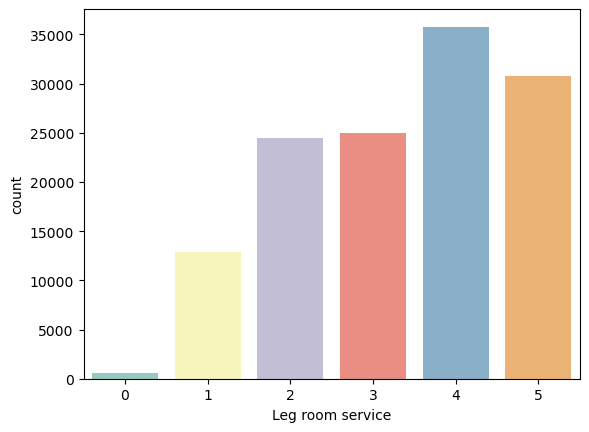

In [56]:
# Create a bar plot of the frequency count of each unique value in the 'Leg room service' column
sns.countplot(x ='Leg room service', data = combined_data)

In [57]:
# Calculate the frequency count of each unique value in the 'Baggage handling' column
combined_data['Baggage handling'].value_counts()

4    46631
5    33761
3    25771
2    14316
1     9008
Name: Baggage handling, dtype: int64

<AxesSubplot:xlabel='Baggage handling', ylabel='count'>

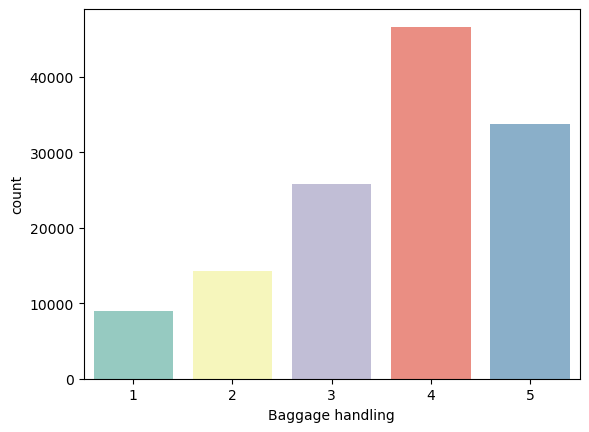

In [58]:
# Create a bar plot of the frequency count of each unique value in the 'Baggage handling' column
sns.countplot(x ='Baggage handling', data = combined_data)

In [59]:
# Calculate the frequency count of each unique value in the 'Checkin service' column
combined_data['Checkin service'].value_counts()

4    36229
3    35343
5    25800
1    16058
2    16056
0        1
Name: Checkin service, dtype: int64

<AxesSubplot:xlabel='Checkin service', ylabel='count'>

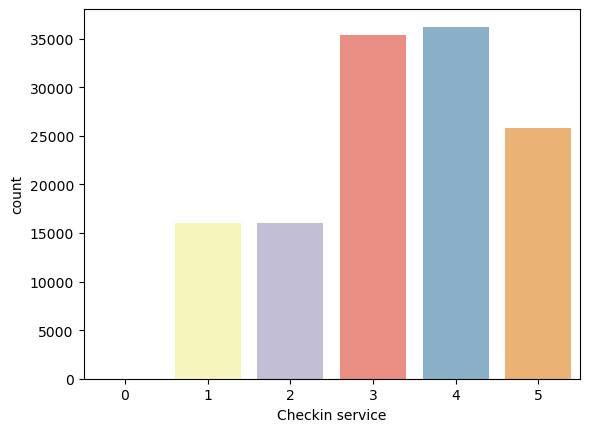

In [60]:
# Create a bar plot of the frequency count of each unique value in the 'Checkin service' column
sns.countplot(x ='Checkin service', data = combined_data)

In [61]:
# Calculate the frequency count of each unique value in the 'Inflight service' column
combined_data['Inflight service'].value_counts()

4    47198
5    33962
3    25232
2    14252
1     8838
0        5
Name: Inflight service, dtype: int64

<AxesSubplot:xlabel='Inflight service', ylabel='count'>

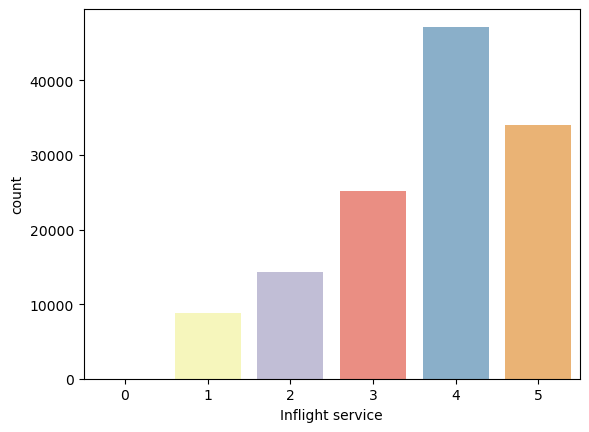

In [62]:
# Create a bar plot of the frequency count of each unique value in the 'Inflight service' column
sns.countplot(x ='Inflight service', data = combined_data)

In [63]:
# Calculate the frequency count of each unique value in the 'Cleanliness' column
combined_data['Cleanliness'].value_counts()

4    33871
3    30552
5    28321
2    20049
1    16680
0       14
Name: Cleanliness, dtype: int64

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

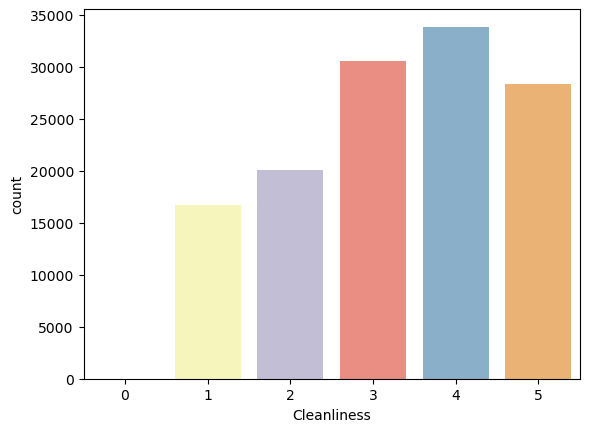

In [64]:
# Create a bar plot of the frequency count of each unique value in the 'Cleanliness' column
sns.countplot(x ='Cleanliness', data = combined_data)

In [65]:
# Create a new DataFrame containing all columns starting from the 7th column of the original DataFrame
new_data = combined_data.iloc[:, 6:]

In [66]:
# Print the new DataFrame
new_data

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [67]:
# Add a new column to the DataFrame that counts the number of zeros in each row
new_data['num of zeros in row'] = (new_data == 0).sum(axis=1)

In [68]:
# Add a new column to the DataFrame that counts the number of ones in each row
new_data['num of ones in row'] = (new_data == 1).sum(axis=1)

In [69]:
# Add a new column to the DataFrame that counts the number of twos in each row
new_data['num of twos in row'] = (new_data == 2).sum(axis=1)

In [70]:
# Add another new column to the DataFrame that counts the number of threes in each row
new_data['num of threes in row'] = (new_data == 3).sum(axis=1)

In [71]:
# Add another new column to the DataFrame that counts the number of fours in each row
new_data['num of fours in row'] = (new_data == 4).sum(axis=1)

In [72]:
# Add another new column to the DataFrame that counts the number of fives in each row
new_data['num of fives in row'] = (new_data == 5).sum(axis=1)

In [73]:
# Print the new DataFrame
new_data

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,num of zeros in row,num of ones in row,num of twos in row,num of threes in row,num of fours in row,num of fives in row
0,3,4,3,1,5,3,5,5,4,3,...,5,25,18.0,neutral or dissatisfied,0,1,0,4,5,6
1,3,2,3,3,1,3,1,1,1,5,...,1,1,6.0,neutral or dissatisfied,0,7,1,5,1,2
2,2,2,2,2,5,5,5,5,4,3,...,5,0,0.0,satisfied,2,0,5,1,4,6
3,2,5,5,5,2,2,2,2,2,5,...,2,11,9.0,neutral or dissatisfied,0,1,7,1,1,4
4,3,3,3,3,4,5,5,3,3,4,...,3,0,0.0,satisfied,2,0,1,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,3,3,3,1,4,3,4,4,3,2,...,4,0,0.0,neutral or dissatisfied,2,1,2,5,6,2
129876,4,4,4,4,4,4,4,4,4,5,...,4,0,0.0,satisfied,2,0,1,0,10,4
129877,2,5,1,5,2,1,2,2,4,3,...,2,0,0.0,neutral or dissatisfied,2,2,7,1,3,3
129878,3,3,3,3,4,4,4,4,3,2,...,4,0,0.0,satisfied,2,0,2,5,6,3


In [74]:
# Count the number of occurrences of each unique value in the 'num of fives in row' column
new_data['num of fives in row'].value_counts()

1     22965
2     18945
0     18941
3     17045
4     12654
5      9755
6      9210
7      8457
8      5197
9      2975
10     1743
11     1031
12      454
13      105
14       10
Name: num of fives in row, dtype: int64

<AxesSubplot:xlabel='num of fives in row', ylabel='count'>

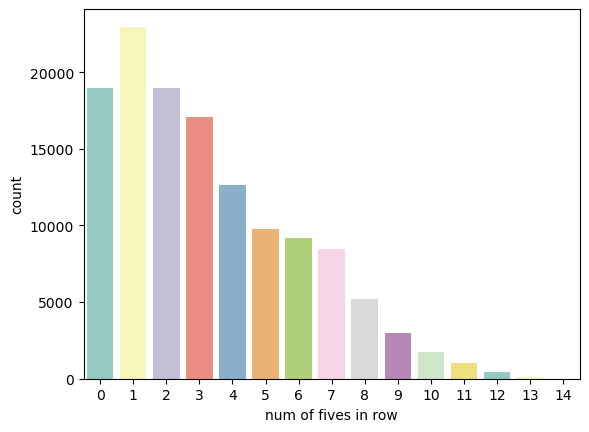

In [75]:
# Create a count plot using seaborn
sns.countplot(x ='num of fives in row', data = new_data, palette=sns.color_palette("Set3"))

In [76]:
# Count the number of occurrences of each unique value in the 'num of fours in row' column
new_data['num of fours in row'].value_counts()

2     20871
3     18916
1     16003
4     14441
5     12756
6     12356
7     10787
8      7196
0      6227
9      4534
10     2847
11     1639
12      716
13      173
14       23
15        2
Name: num of fours in row, dtype: int64

<AxesSubplot:xlabel='num of fours in row', ylabel='count'>

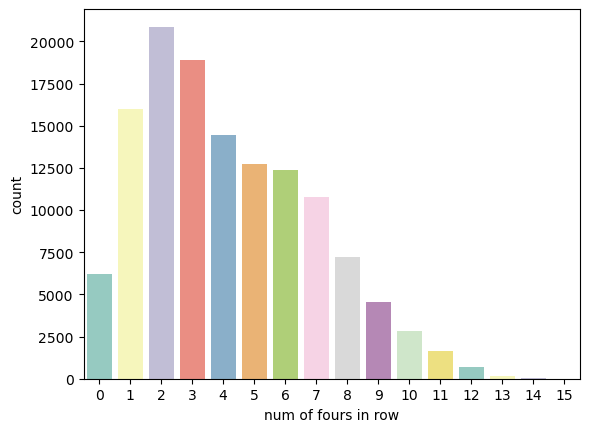

In [77]:
# Create a count plot using seaborn
sns.countplot(x ='num of fours in row', data = new_data, palette=sns.color_palette("Set3"))

In [78]:
# Count the number of occurrences of each unique value in the 'num of threes in row' column
new_data['num of threes in row'].value_counts()

1     26452
2     22987
3     14937
4     13545
0     13308
5     13123
6      9483
7      6004
8      4064
9      2766
10     1573
11      886
12      304
13       49
14        6
Name: num of threes in row, dtype: int64

<AxesSubplot:xlabel='num of threes in row', ylabel='count'>

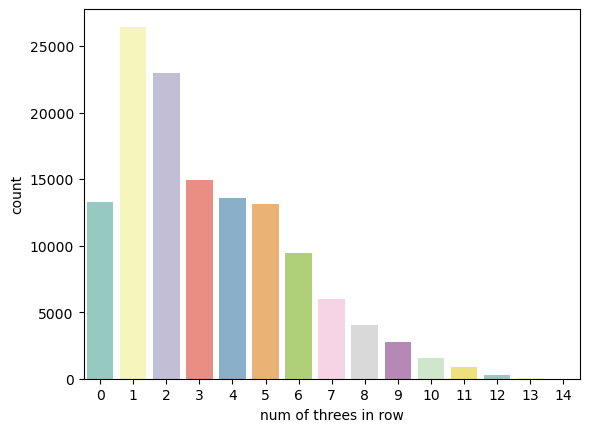

In [79]:
# Create a count plot using seaborn
sns.countplot(x ='num of threes in row', data = new_data, palette=sns.color_palette("Set3"))

In [80]:
# Count the number of occurrences of each unique value in the 'num of twos in row' column
new_data['num of twos in row'].value_counts()

1     32049
2     21200
0     17194
4     13119
5     12913
3     12128
6      8127
7      4940
8      3541
9      2130
10     1269
11      614
12      205
13       50
14        8
Name: num of twos in row, dtype: int64

<AxesSubplot:xlabel='num of twos in row', ylabel='count'>

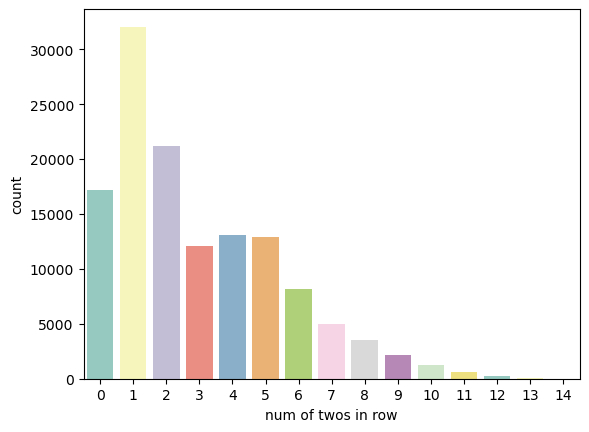

In [81]:
# Create a count plot using seaborn
sns.countplot(x ='num of twos in row', data = new_data, palette=sns.color_palette("Set3"))

In [82]:
# Count the number of occurrences of each unique value in the 'num of ones in row' column
new_data['num of ones in row'].value_counts()

0     41619
1     30724
2     15393
4     13753
3     10145
5      8123
6      4332
7      2581
8      1429
9       800
10      409
11      127
12       44
13        8
Name: num of ones in row, dtype: int64

<AxesSubplot:xlabel='num of ones in row', ylabel='count'>

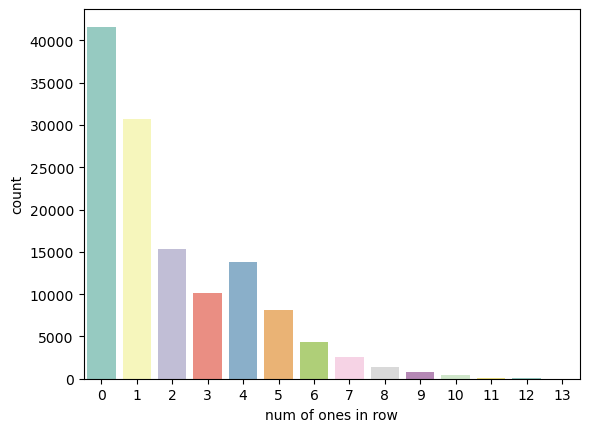

In [83]:
# Create a count plot using seaborn
sns.countplot(x ='num of ones in row', data = new_data, palette=sns.color_palette("Set3"))

In [84]:
# Count the number of occurrences of each unique value in the 'num of zeros in row' column
new_data['num of zeros in row'].value_counts()

2    55689
0    39909
1    26542
3     3512
4     1976
5     1472
6      387
Name: num of zeros in row, dtype: int64

<AxesSubplot:xlabel='num of zeros in row', ylabel='count'>

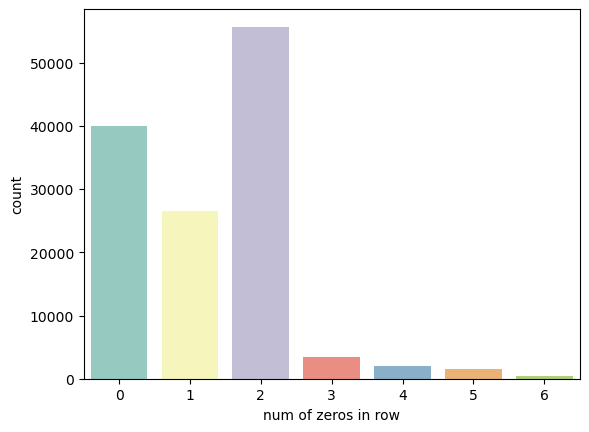

In [85]:
# Create a count plot using seaborn
sns.countplot(x ='num of zeros in row', data = new_data, palette=sns.color_palette("Set3"))

In [86]:
# Replace the values in the 'satisfaction' column with numeric values
combined_data['satisfaction'] = combined_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1])

In [87]:
# Count the number of occurrences of each unique value in the 'satisfaction' column
combined_data['satisfaction'].value_counts()

0    73225
1    56262
Name: satisfaction, dtype: int64

In [88]:
# Create a subset of the data containing a subset of columns
subset = combined_data[["Inflight wifi service", "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness", "satisfaction"]]

# Calculate the correlation matrix for this subset of columns
corr = subset.corr()

<AxesSubplot:>

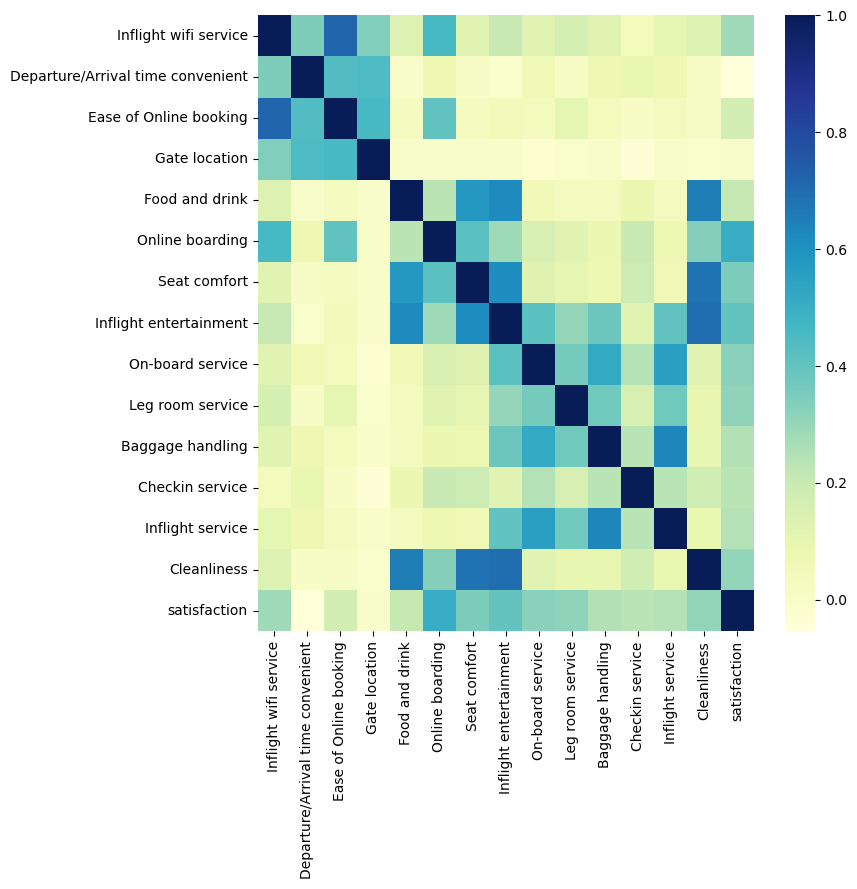

In [89]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="YlGnBu")

In [90]:
# Create a new column in the DataFrame that calculates the total delay for each flight
new_data['total delay'] = new_data['Departure Delay in Minutes'] + new_data['Arrival Delay in Minutes']

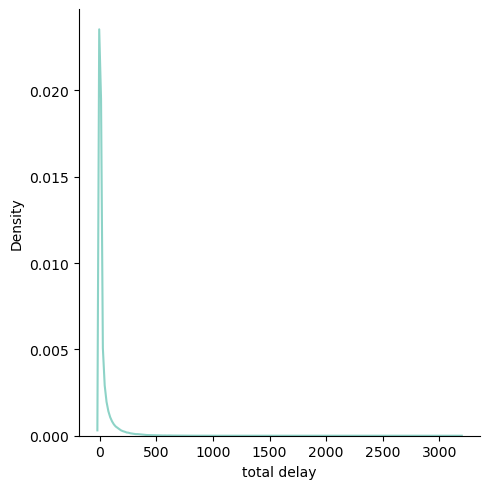

In [91]:
# Generate a KDE plot of the total delay using seaborn
sns.displot(new_data, x="total delay", kind="kde")

([<matplotlib.patches.Wedge at 0x2e8add22310>,
 [Text(-0.38879860662786186, 1.8291352173866844, ''),
  Text(0.3887986066278624, -1.8291352173866844, '')],
 [Text(-0.212071967251561, 0.9977101185745552, '57%'),
  Text(0.2120719672515613, -0.9977101185745552, '43%')])

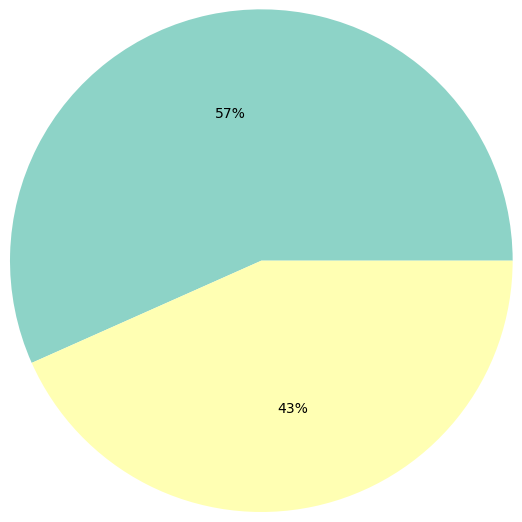

In [92]:
# Define the number of observations in each satisfaction class
satisfactionClasses =[58879, 45025]

# Generate a pie chart of the satisfaction classes using matplotlib
plt.pie(satisfactionClasses,  radius=1.7, colors=colors, 
        rotatelabels=False, autopct= "%1.0f%%")

# Models

# 1) Gradient Boost Classifier

In [93]:
# Split the data into features (X) and target (y)
X = combined_data.drop(columns=['satisfaction'])
y = combined_data['satisfaction']

In [94]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [96]:
# Evaluate the model on the validation set
y_pred_gb = gb_clf.predict(X_val)
gb_accuracy = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting Classifier Validation Accuracy:", gb_accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_gb))

Gradient Boosting Classifier Validation Accuracy: 0.9402656575797359
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14668
           1       0.94      0.92      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898

Confusion Matrix:
[[14025   643]
 [  904 10326]]


<AxesSubplot:>

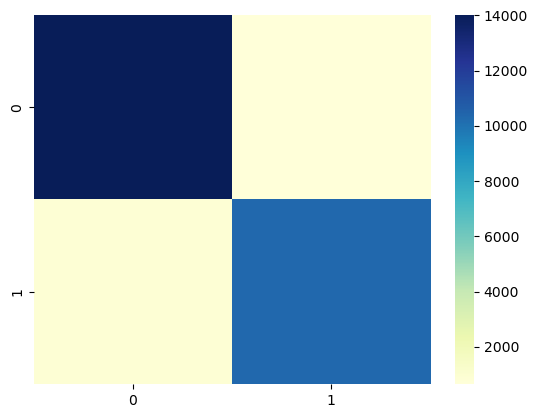

In [97]:
# Calculate the confusion matrix
cm_gb = confusion_matrix(y_val, y_pred_gb)
sns.heatmap(cm_gb, cmap="YlGnBu")

# 2) AdaBoost Classifier

In [98]:
# Train an AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [99]:
# Evaluate the model on the validation set
y_pred_ada = ada_clf.predict(X_val)
ada_accuracy = accuracy_score(y_val, y_pred_ada)
print("AdaBoost Classifier Validation Accuracy:", ada_accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred_ada))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ada))

AdaBoost Classifier Validation Accuracy: 0.9153602594794965
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     14668
           1       0.92      0.89      0.90     11230

    accuracy                           0.92     25898
   macro avg       0.92      0.91      0.91     25898
weighted avg       0.92      0.92      0.92     25898

Confusion Matrix:
[[13759   909]
 [ 1283  9947]]


<AxesSubplot:>

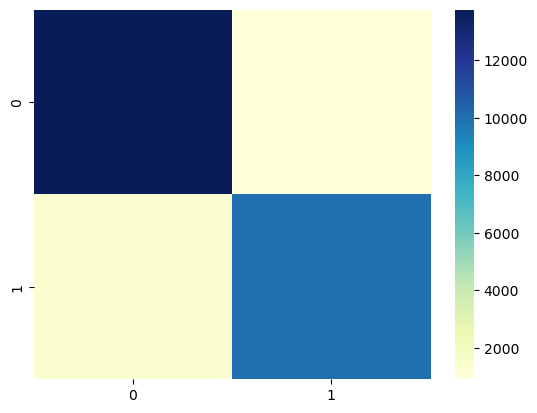

In [100]:
# Calculate the confusion matrix
cm_ada = confusion_matrix(y_val, y_pred_ada)
sns.heatmap(cm_ada, cmap="YlGnBu")

In [101]:
print(combined_data.isnull().sum())


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
